In [126]:

from sys import path
path.insert(0, '/Users/h/Github/geo_data_group/')
import data_year as dy
import grid_set as gs
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
# from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import glob
import datetime as dt
from dateutil.relativedelta import relativedelta
import gc
import copy
from imp import reload
import budget_analysis as ba
import budget_accum as b
import budget_inputs as bi
reload(dy)
reload(ba)
reload(gs)

<module 'grid_set' from '/Users/h/Github/geo_data_group/grid_set.py'>

In [2]:

### SET the grid for the output data
### You 'should' be able to change the projecton here

# m = Basemap(projection='npstere',boundinglat=65,lon_0=0)
m = ccrs.LambertAzimuthalEqualArea(central_latitude=90)
G = gs.grid_set(m)
G.load_grid('grids/NSIDC_gs.npz')
G.get_grid_mask()

Loaded a grid: grids/NSIDC_gs.npz


In [192]:
Ghole = G.lats>86.9
G.area[Ghole].sum()*1e-9 ## area of hole in 1000s km2

373.49809545664783

In [3]:
G.mask[G.lats>87.4] = np.nan

In [4]:
f = plt.figure()
Gplot= gs.grid_set(m)

ax = f.add_subplot(1,1,1,projection=m)
ax.set_extent([-180, 180, 50, 90], ccrs.PlateCarree())
Gplot.set_grid_mn(30,30,ax)
Gplot.get_grid_info(av_ang=False)
plt.close()

G2Gplot= gs.Gs2Gs(G,Gplot,vectors=True)

Got a grid res =  30  x  30
Grid distances calculated:  301608.63737844786  x  301196.8593246297
Angles calculated


In [5]:
m = ccrs.LambertAzimuthalEqualArea(central_latitude=90)
Gates_list = ba.load_gate_grids('./grids/Gate_grids/',m,old_list=True)
# Gates_list = ba.load_gates('./grids/Gate_grids/',m)

Loaded a grid: ./grids/Gate_grids/Gate_Fram.npz
Loaded mask,  33  x  2  inflated by  0.0
Loaded a grid: ./grids/Gate_grids/Gate_BarentsBot.npz
Loaded mask,  39  x  2  inflated by  0.0
Loaded a grid: ./grids/Gate_grids/Gate_BarentsTop.npz
Loaded mask,  35  x  2  inflated by  0.0
Loaded a grid: ./grids/Gate_grids/Gate_KaraTop.npz
Loaded mask,  31  x  2  inflated by  0.0
Loaded a grid: ./grids/Gate_grids/Gate_KaraBot.npz
Loaded mask,  24  x  2  inflated by  0.0
Loaded a grid: ./grids/Gate_grids/Gate_Chukchi.npz
Loaded mask,  10  x  2  inflated by  0.0
Loaded a grid: ./grids/Gate_grids/Gate_BaffinTop.npz
Loaded mask,  26  x  2  inflated by  0.0
Loaded a grid: ./grids/Gate_grids/Gate_BaffinBot.npz
Loaded mask,  22  x  2  inflated by  0.0
Loaded a grid: ./grids/Gate_grids/Gate_Central_east.npz
Loaded mask,  84  x  2  inflated by  0.0
Loaded a grid: ./grids/Gate_grids/Gate_Central_west.npz
Loaded mask,  65  x  2  inflated by  0.0
Loaded a grid: ./grids/Gate_grids/Gate_Chukchi_Beaufort.npz
Loa

In [130]:
#### HERE WE SET THE OUTPUT DATA
## The directory should be full of the budfeilds files from the budget process tool
## monthlies only

# save_dir = '/Users/h/PREMELT/Budget/Outputs/Outputs_2022_08_25/out_Pathfinder_nt_Bristol_full_years/GrowMelt_EASE_NH/'
# save_dir = '/Users/h/PREMELT/Budget/Outputs/Outputs_2023_08_17/out_OSISAF_nt_Bristol_full_year_max/GrowMelt_EASE_NH/'
save_dir = '/Users/h/PREMELT/Budget/Outputs/Outputs_2023_08_17/out_OSISAF_nt_Bristol_full_year_min/GrowMelt_EASE_NH/'
# save_dir = '/Users/h/PREMELT/Budget/Outputs/Outputs_2023_11_01/out_Pathfinder_nt_Bristol_full_year_min/GrowMelt_EASE_NH/'
bud1 = ba.budget_result(save_dir,year_limit=[2010,2022],verbos=True,
        ignore_file = ['budfields_20101014--20110415.nc','budfields_20201015--20201230.nc'],
#         ignore_file = ['budfields_20101014--20110415.nc','budfields_20200415--20201230.nc',],#'budfields_20101031--20111015.nc'],
        var_load=['intensification','advection','divergence','residual',
                 'ice_drift_x','ice_drift_y','concentration','thickness','dynamics',
                 'div_t','adv_t','int_t','res_t','dyn_t','new_ice','old_ice',
                  'div_sig','adv_sig','int_sig','res_sig','dyn_sig',
                  'old_ice','new_ice','U_sig','V_sig','Vol_sig',
                  'inst_thickness','inst_thickness_sig'
                 ])
# test_bud = ba.budget_result_monthly(save_dir)

/Users/h/PREMELT/Budget/Outputs/Outputs_2023_08_17/out_OSISAF_nt_Bristol_full_year_min/GrowMelt_EASE_NH/budfields_20101016--20111015.nc
20101016
/Users/h/PREMELT/Budget/Outputs/Outputs_2023_08_17/out_OSISAF_nt_Bristol_full_year_min/GrowMelt_EASE_NH/budfields_20111015--20121015.nc
20111015
/Users/h/PREMELT/Budget/Outputs/Outputs_2023_08_17/out_OSISAF_nt_Bristol_full_year_min/GrowMelt_EASE_NH/budfields_20121015--20131015.nc
20121015
/Users/h/PREMELT/Budget/Outputs/Outputs_2023_08_17/out_OSISAF_nt_Bristol_full_year_min/GrowMelt_EASE_NH/budfields_20131015--20141015.nc
20131015
/Users/h/PREMELT/Budget/Outputs/Outputs_2023_08_17/out_OSISAF_nt_Bristol_full_year_min/GrowMelt_EASE_NH/budfields_20141015--20151015.nc
20141015
/Users/h/PREMELT/Budget/Outputs/Outputs_2023_08_17/out_OSISAF_nt_Bristol_full_year_min/GrowMelt_EASE_NH/budfields_20151015--20161015.nc
20151015
/Users/h/PREMELT/Budget/Outputs/Outputs_2023_08_17/out_OSISAF_nt_Bristol_full_year_min/GrowMelt_EASE_NH/budfields_20161015--201710

In [131]:
bud1.n_t,bud1.fdates

(10,
 [datetime.datetime(2010, 10, 16, 0, 0),
  datetime.datetime(2011, 10, 15, 0, 0),
  datetime.datetime(2012, 10, 15, 0, 0),
  datetime.datetime(2013, 10, 15, 0, 0),
  datetime.datetime(2014, 10, 15, 0, 0),
  datetime.datetime(2015, 10, 15, 0, 0),
  datetime.datetime(2016, 10, 15, 0, 0),
  datetime.datetime(2017, 10, 15, 0, 0),
  datetime.datetime(2018, 10, 15, 0, 0),
  datetime.datetime(2019, 10, 15, 0, 0)])

In [134]:
Gate_data1 = ba.load_gates(save_dir,Gates_list,year_limit=[2010,2019],#verbos = True,
        ignore_file = ['budfields_20101014--20110415.nc','budfields_20200415--20201230.nc','budfields_20101031--20111015.nc'],
        var_load=['transport_x','transport_y','ice_drift_x','ice_drift_y',
                  'trans_x_sig','trans_y_sig',
                 ])

In [135]:
Gate_data1[2].fdates

[datetime.datetime(2010, 10, 16, 0, 0),
 datetime.datetime(2011, 10, 15, 0, 0),
 datetime.datetime(2012, 10, 15, 0, 0),
 datetime.datetime(2013, 10, 15, 0, 0),
 datetime.datetime(2014, 10, 15, 0, 0),
 datetime.datetime(2015, 10, 15, 0, 0),
 datetime.datetime(2016, 10, 15, 0, 0),
 datetime.datetime(2017, 10, 15, 0, 0),
 datetime.datetime(2018, 10, 15, 0, 0),
 datetime.datetime(2019, 10, 15, 0, 0)]

In [12]:
### Force add the thin ice terms
msk = np.isfinite(bud1.int_t)
bud1.intensification[msk] += bud1.int_t[msk]
msk = np.isfinite(bud1.div_t)
bud1.divergence[msk] += bud1.div_t[msk]
msk = np.isfinite(bud1.adv_t)
bud1.advection[msk] += bud1.adv_t[msk]
msk = np.isfinite(bud1.res_t)
bud1.residual[msk] += bud1.res_t[msk]

In [13]:
bud1.MIZ = bud1.int_t+bud1.old_ice+bud1.new_ice

/Users/h/.local/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice
  app.launch_new_instance()
/Users/h/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: Mean of empty slice
/Users/h/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice
/Users/h/.local/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


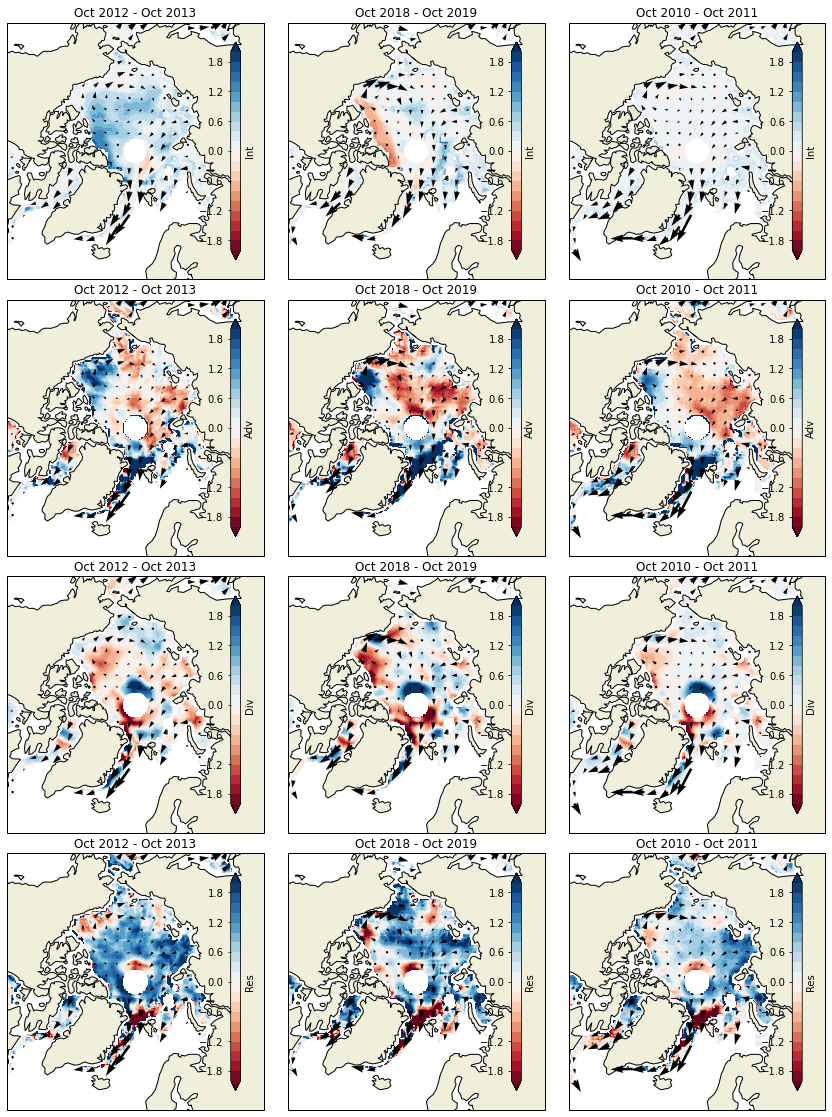

In [14]:
row_vars = [bud1.intensification,bud1.advection,bud1.divergence,bud1.residual,]
row_labs = ['Int','Adv','Div','Res',]
row_rngs = [np.arange(-2.0,2.2,0.2)]*4
row_maps = [plt.cm.RdBu]*4
# tlist = [slice(t,t+1) for t in range(6)]
# tlist = [slice(t,t+1) for t in range(bud1.nyrs)]
# tlist = [slice(0,bud1.nyrs,2),slice(1,bud1.nyrs,2),]
# tlist = [slice(0,bud1.nyrs,2),slice(1,bud1.nyrs,2),]
tlist = [slice(2,3),slice(8,9),slice(0,12)]
labels = [bud1.dates[t][0].strftime('%b %Y')+' - '+(bud1.dates[t][0]+relativedelta(years=1)).strftime('%b %Y') for t in tlist] 
labels = labels+['Mean']
fig = plt.figure(figsize=(5*len(tlist),5*len(row_vars)))
for rn,(rv,rl,rr,rm) in enumerate(zip(row_vars,row_labs,row_rngs,row_maps)):
    for pn,(t,lab) in enumerate(zip(tlist,labels)):
        ax = fig.add_subplot(len(row_vars),len(tlist),rn*len(tlist)+pn+1,projection=m)
        ax = ba.plot_single(np.nanmean(rv[t],axis = 0),rr,G,
                            vecx = np.nanmean(bud1.ice_drift_x[t],axis = 0),
                            vecy = np.nanmean(bud1.ice_drift_y[t],axis = 0),
                            rvGplot=G2Gplot,return_ax = True,give_ax=ax,
                            label=rl,cmap = rm)
        ax.set_title(lab)
fig.subplots_adjust(hspace=0.08,wspace=0.02)
fig.savefig(save_dir+'new_old_ice_'+'_'.join([labels[0],labels[-1]]).replace(' ','-')+'.png',bbox_inches='tight')
fig.show()

/Users/h/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice
  if sys.path[0] == '':
/Users/h/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: Mean of empty slice
  del sys.path[0]
/Users/h/.local/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  
/Users/h/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


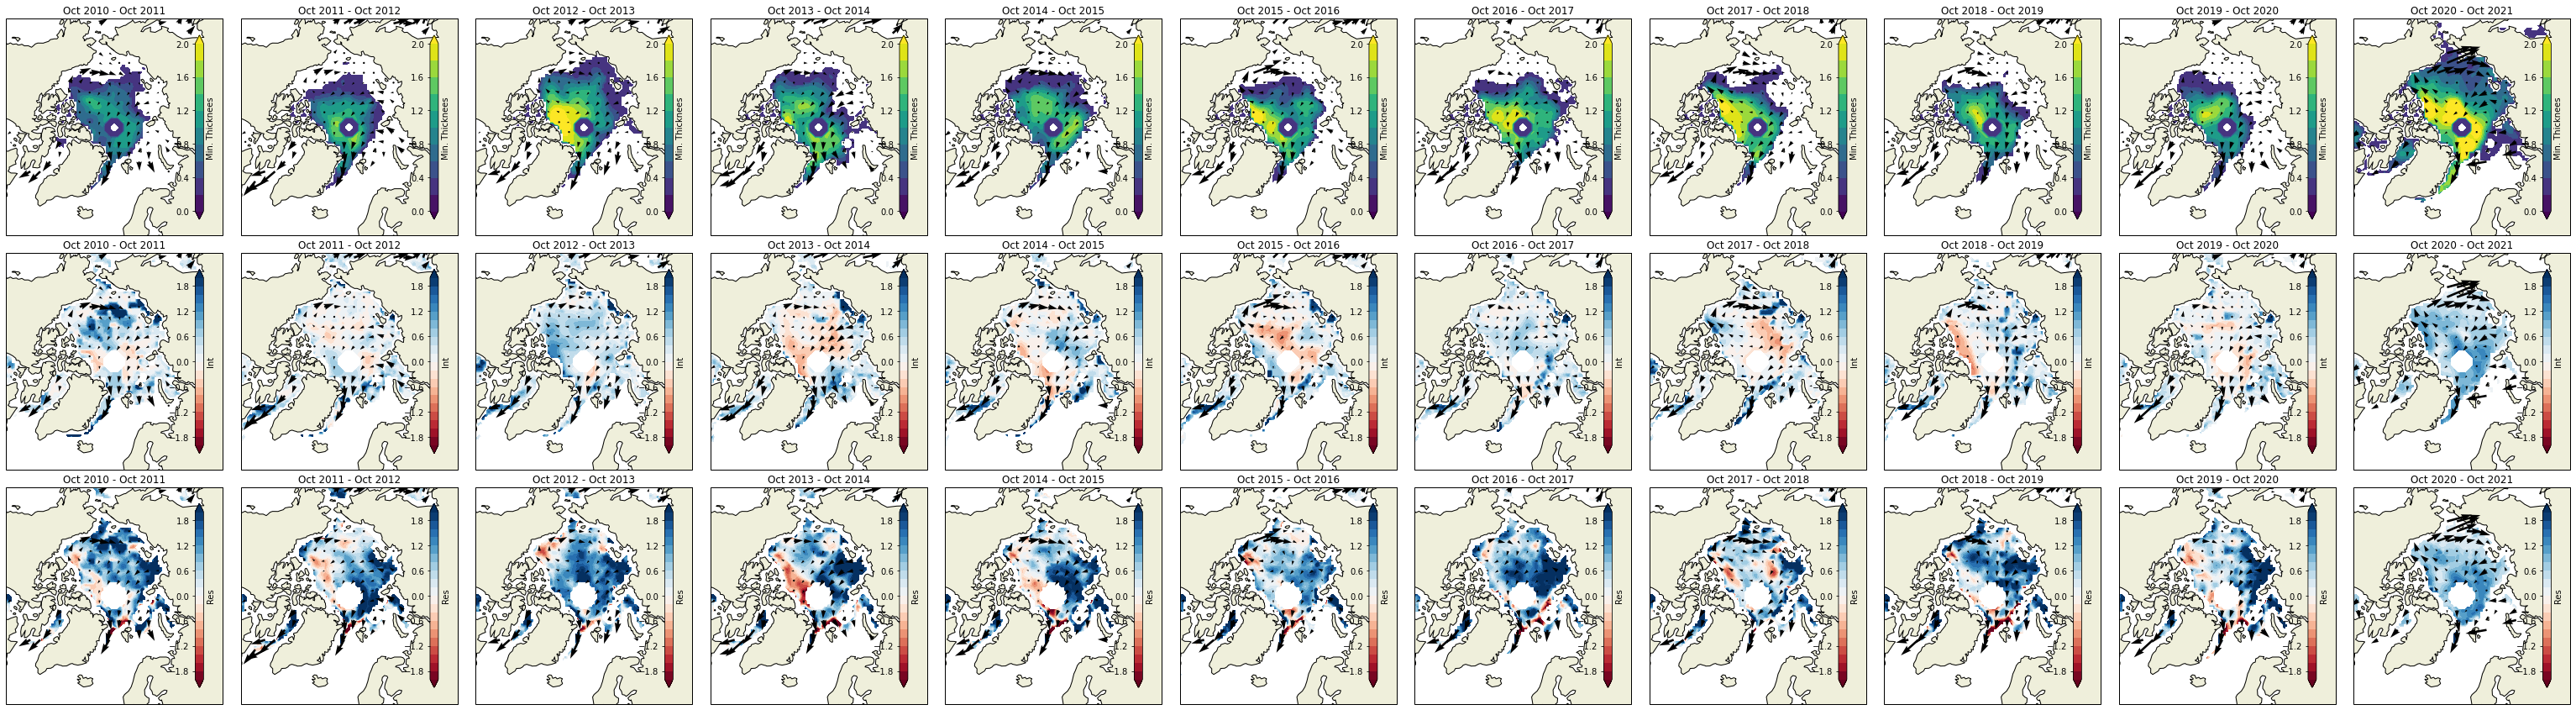

In [15]:
row_vars = [bud1.inst_thickness,bud1.intensification,bud1.residual,]
row_labs = ['Min. Thicknees','Int','Res',]
row_rngs = [np.arange(0.0,2.2,0.2),np.arange(-2.0,2.2,0.2),np.arange(-2.0,2.2,0.2)]
row_maps = [plt.cm.viridis,plt.cm.RdBu,plt.cm.RdBu]
# tlist = [slice(t,t+1) for t in range(6)]
tlist = [slice(t,t+1) for t in range(bud1.nyrs)]
labels = [bud1.dates[t][0].strftime('%b %Y')+' - '+(bud1.dates[t][0]+relativedelta(years=1)).strftime('%b %Y') for t in tlist] 
fig = plt.figure(figsize=(5*len(tlist),5*len(row_vars)))
for rn,(rv,rl,rr,rm) in enumerate(zip(row_vars,row_labs,row_rngs,row_maps)):
    for pn,(t,lab) in enumerate(zip(tlist,labels)):
        ax = fig.add_subplot(len(row_vars),len(tlist),rn*len(tlist)+pn+1,projection=m)
        ax = ba.plot_single(np.nanmean(rv[t],axis = 0),rr,G,
                            vecx = np.nanmean(bud1.ice_drift_x[t],axis = 0),
                            vecy = np.nanmean(bud1.ice_drift_y[t],axis = 0),
                            rvGplot=G2Gplot,return_ax = True,give_ax=ax,
                            label=rl,cmap = rm)
        ax.set_title(lab)
fig.subplots_adjust(hspace=0.08,wspace=0.02)
# fig.savefig(save_dir+'new_old_ice_'+'_'.join([labels[0],labels[-1]]).replace(' ','-')+'.png',bbox_inches='tight')
fig.show()

/Users/h/.local/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  
/Users/h/.local/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice
  from ipykernel import kernelapp as app
/Users/h/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


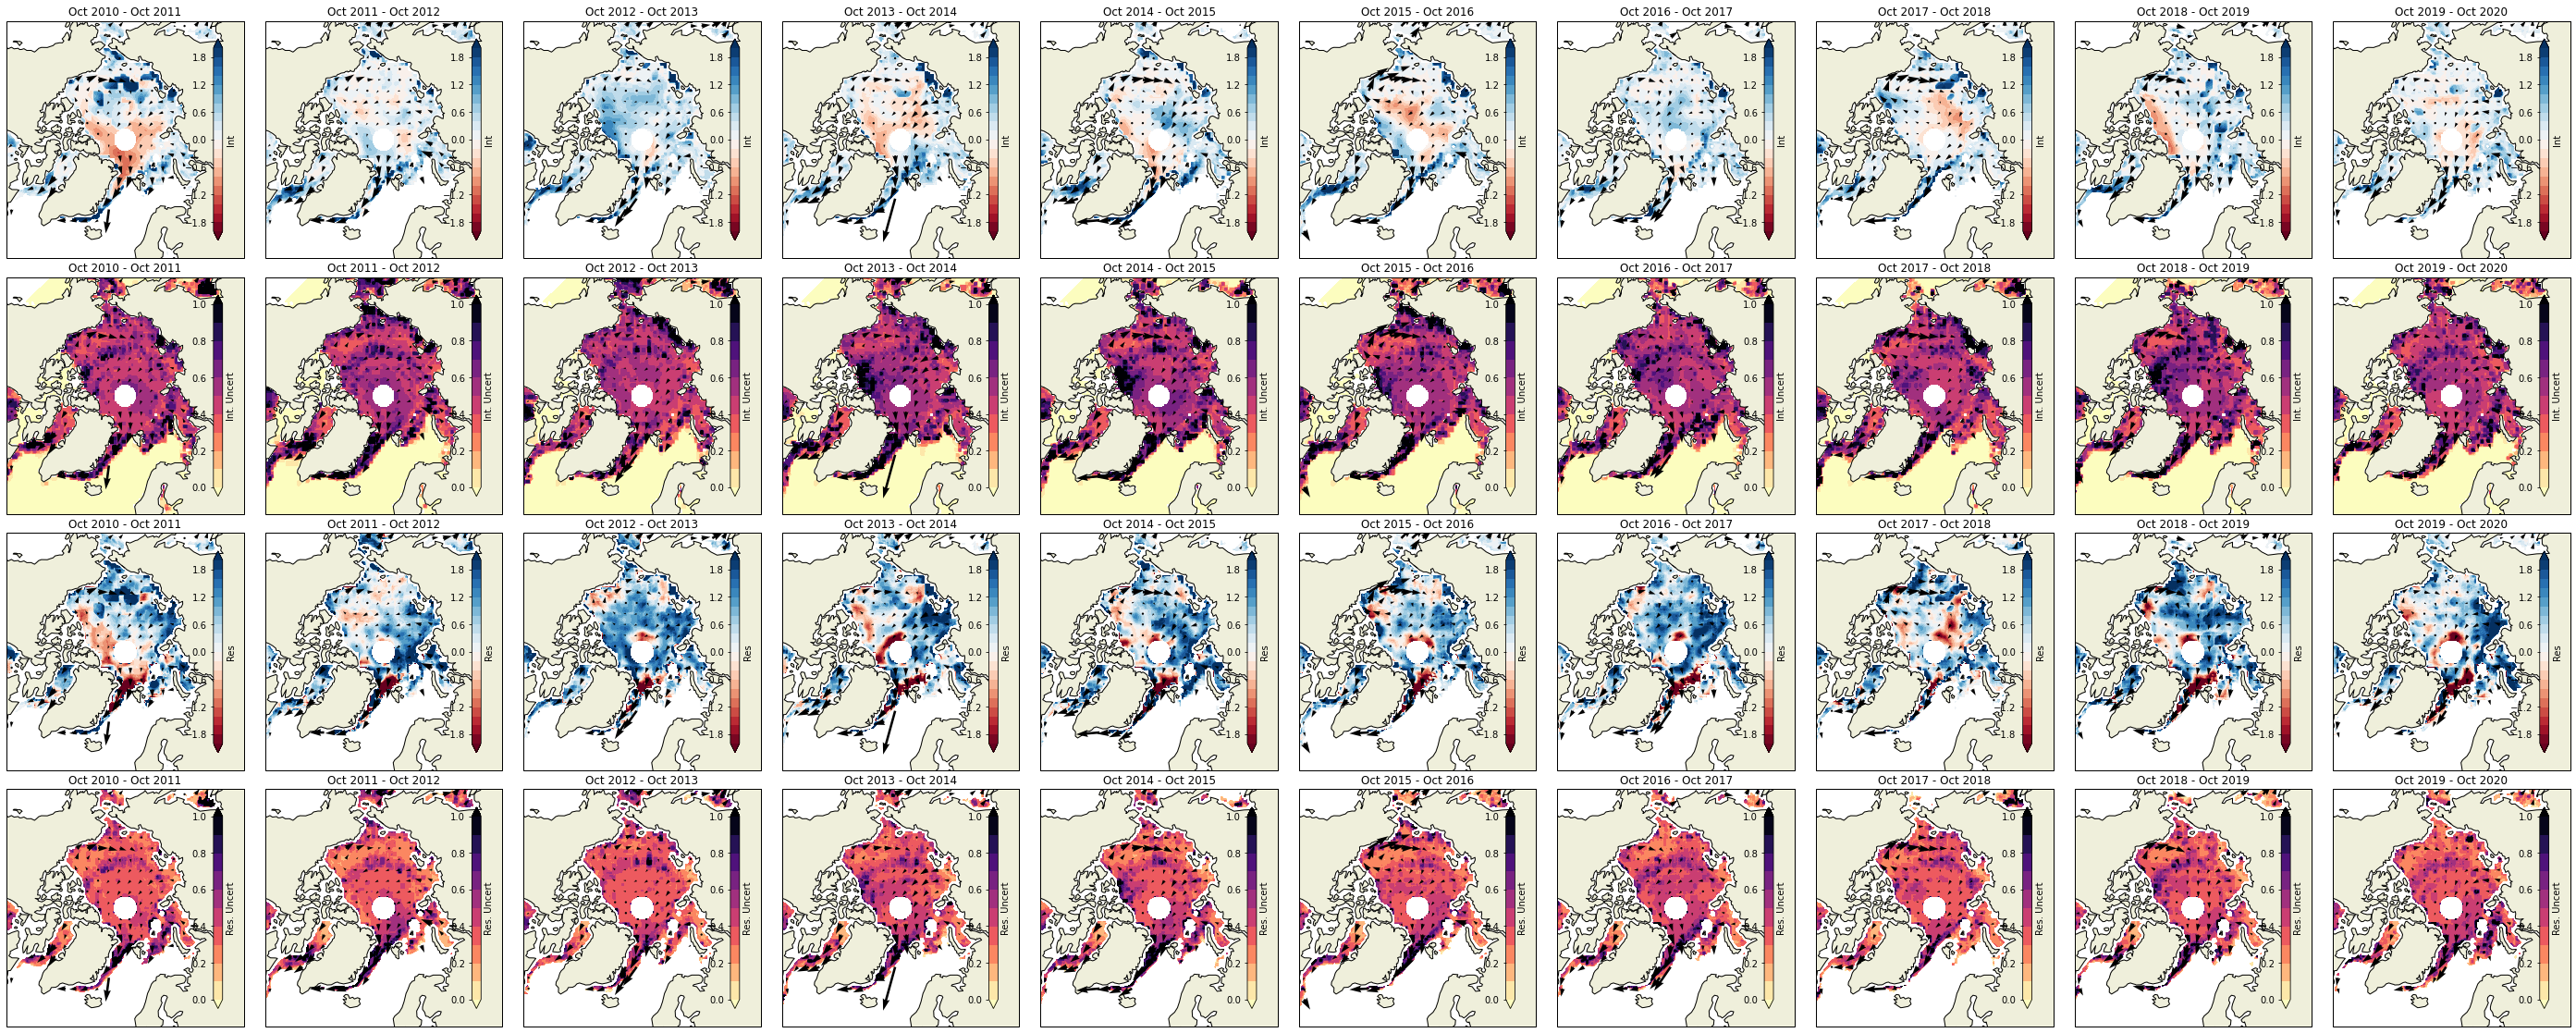

In [38]:
row_vars = [bud1.intensification,np.sqrt(bud1.int_sig),bud1.residual,np.sqrt(bud1.res_sig),]
row_labs = ['Int','Int. Uncert','Res','Res. Uncert',]
row_rngs = [np.arange(-2.0,2.2,0.2),np.arange(0.0,1.1,0.1)]*2
row_maps = [plt.cm.RdBu,plt.cm.magma_r]*2
# tlist = [slice(t,t+1) for t in range(6)]
tlist = [slice(t,t+1) for t in range(bud1.nyrs)]
labels = [bud1.dates[t][0].strftime('%b %Y')+' - '+(bud1.dates[t][0]+relativedelta(years=1)).strftime('%b %Y') for t in tlist] 
fig = plt.figure(figsize=(5*len(tlist),5*len(row_vars)))
for rn,(rv,rl,rr,rm) in enumerate(zip(row_vars,row_labs,row_rngs,row_maps)):
    for pn,(t,lab) in enumerate(zip(tlist,labels)):
        ax = fig.add_subplot(len(row_vars),len(tlist),rn*len(tlist)+pn+1,projection=m)
#         ax = ba.plot_single(np.nansum(rv[t],axis = 0),rr,G,
        ax = ba.plot_single(rv[t][0],rr,G,
                            vecx = np.nanmean(bud1.ice_drift_x[t],axis = 0),
                            vecy = np.nanmean(bud1.ice_drift_y[t],axis = 0),
                            rvGplot=G2Gplot,return_ax = True,give_ax=ax,
                            label=rl,cmap = rm)
        ax.set_title(lab)
fig.subplots_adjust(hspace=0.08,wspace=0.02)
# fig.savefig(save_dir+'new_old_ice_'+'_'.join([labels[0],labels[-1]]).replace(' ','-')+'.png',bbox_inches='tight')
fig.show()

/Users/h/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/Users/h/.local/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice
  from ipykernel import kernelapp as app
/Users/h/.local/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice
  app.launch_new_instance()
/Users/h/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: Mean of empty slice
/Users/h/.local/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


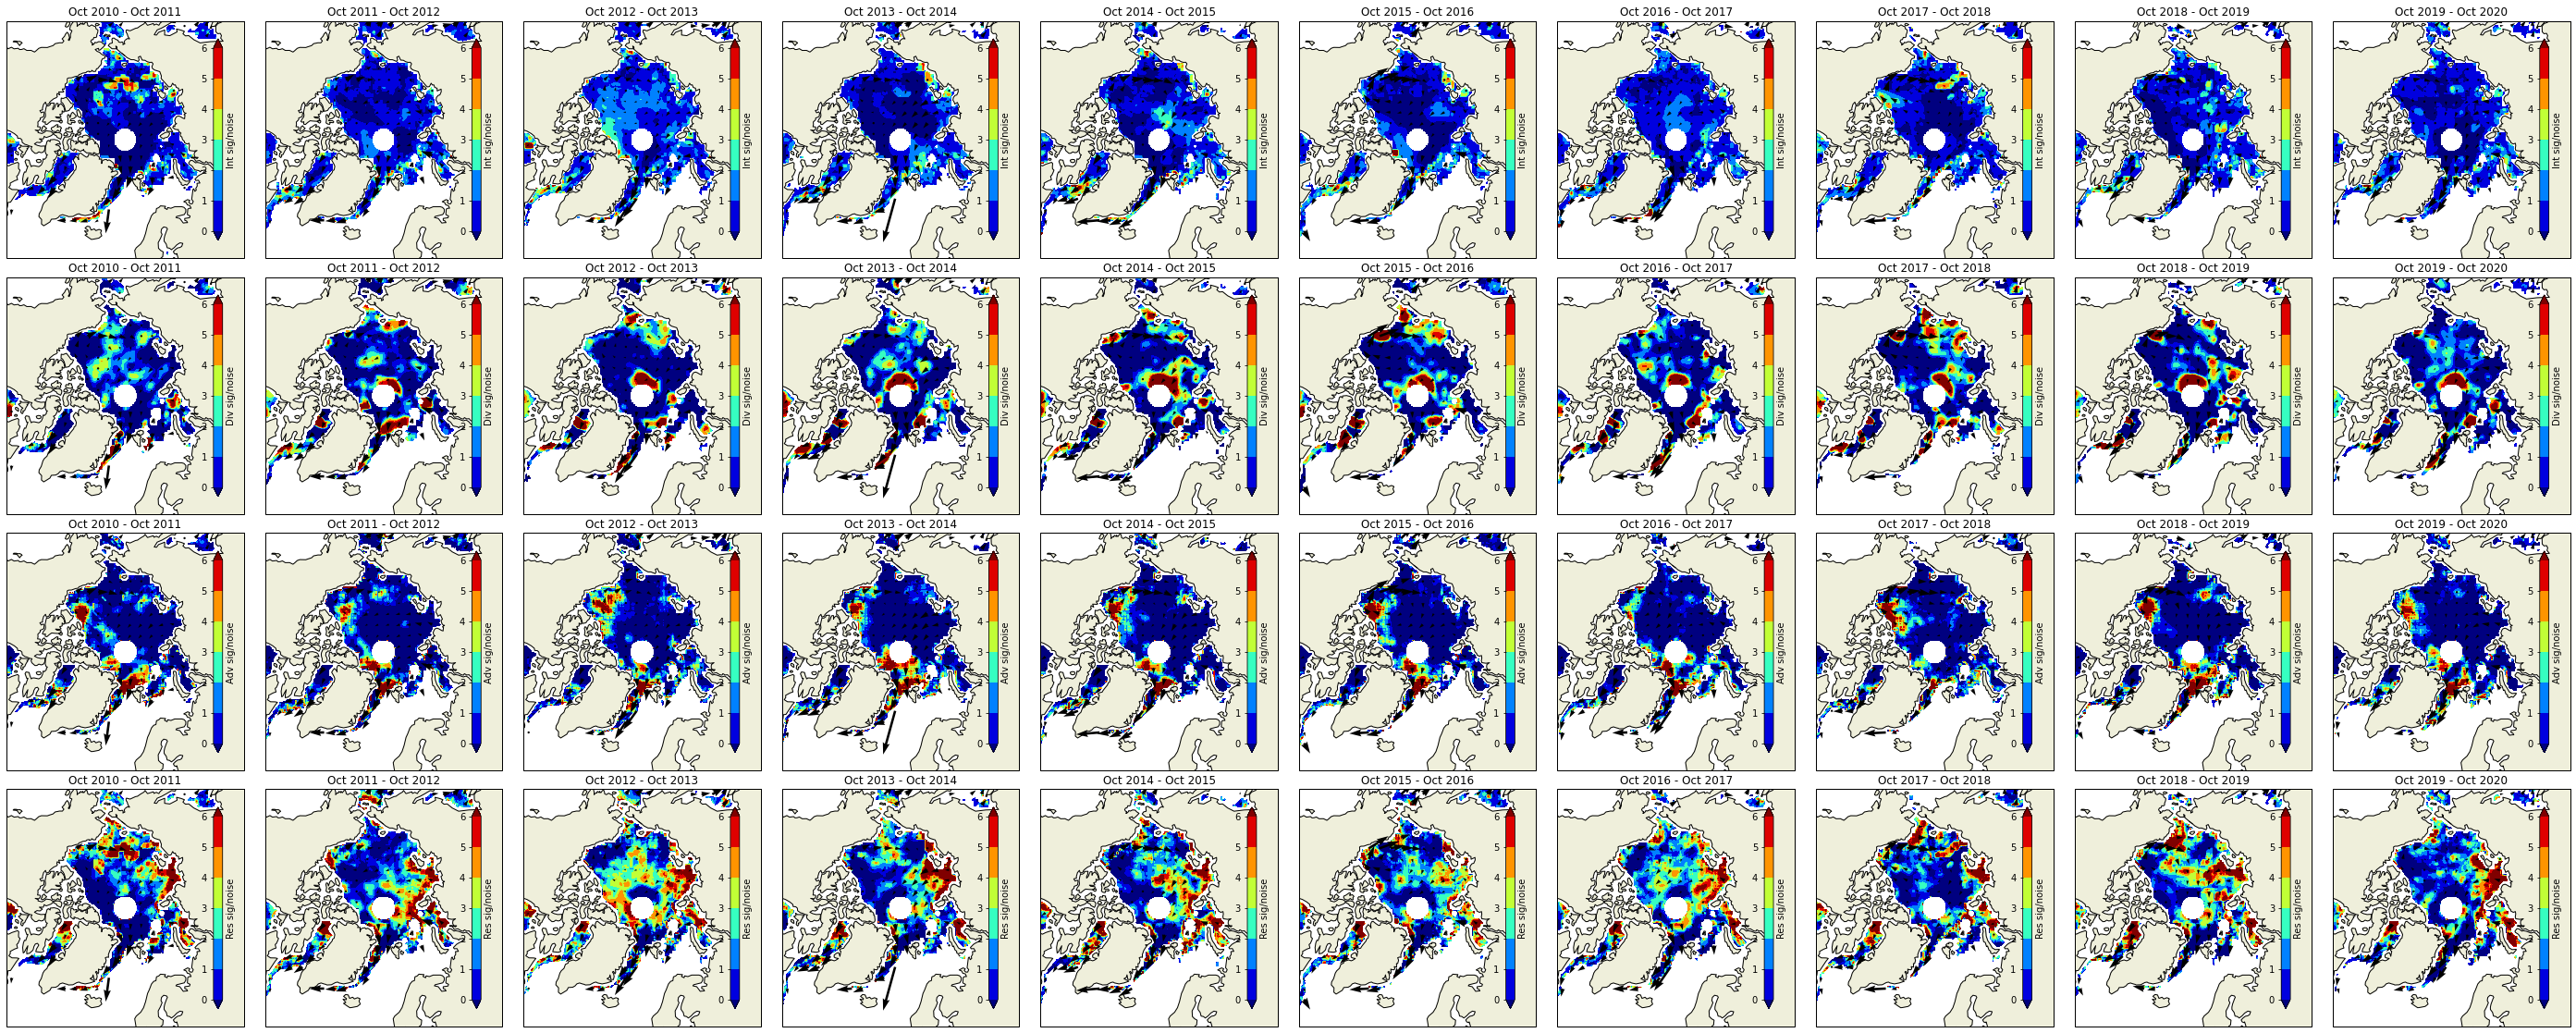

In [33]:
row_vars = [bud1.intensification/np.sqrt(bud1.int_sig),
            bud1.divergence/np.sqrt(bud1.div_sig),
            bud1.advection/np.sqrt(bud1.adv_sig),
            bud1.residual/np.sqrt(bud1.res_sig),]
row_labs = ['Int sig/noise','Div sig/noise','Adv sig/noise','Res sig/noise',]
row_rngs = [np.arange(0.0,7.0,1.0)]*4
row_maps = [plt.cm.jet]*4
# tlist = [slice(t,t+1) for t in range(6)]
tlist = [slice(t,t+1) for t in range(bud1.nyrs)]
labels = [bud1.dates[t][0].strftime('%b %Y')+' - '+(bud1.dates[t][0]+relativedelta(years=1)).strftime('%b %Y') for t in tlist] 
fig = plt.figure(figsize=(5*len(tlist),5*len(row_vars)))
for rn,(rv,rl,rr,rm) in enumerate(zip(row_vars,row_labs,row_rngs,row_maps)):
    for pn,(t,lab) in enumerate(zip(tlist,labels)):
        ax = fig.add_subplot(len(row_vars),len(tlist),rn*len(tlist)+pn+1,projection=m)
        ax = ba.plot_single(np.nanmean(rv[t],axis = 0),rr,G,
                            vecx = np.nanmean(bud1.ice_drift_x[t],axis = 0),
                            vecy = np.nanmean(bud1.ice_drift_y[t],axis = 0),
                            rvGplot=G2Gplot,return_ax = True,give_ax=ax,
                            label=rl,cmap = rm)
        ax.set_title(lab)
fig.subplots_adjust(hspace=0.08,wspace=0.02)
# fig.savefig(save_dir+'new_old_ice_'+'_'.join([labels[0],labels[-1]]).replace(' ','-')+'.png',bbox_inches='tight')
fig.show()

In [15]:
#### read NSIDC mask
mfile= '/Users/h/PREMELT/Budget/Michel_budget_plots/NSIDC_Regions_Masks.nc'
# mfile= '/Users/h/PREMELT/Budget/Michel_budget_plots/masks/mask_joint_int_clim_all.npy'
# mfile= '/Users/h/PREMELT/Budget/Michel_budget_plots/masks/mask_joint_int_months_100.npy'
Nmask = np.flipud(Dataset(mfile).variables['mask'][:].T)

rnames = [] 
for n,rn in enumerate(Dataset(mfile).variables['region_names'][:]):
    name = str(n+1)+': '
    for r in rn:
        name+=r.decode('UTF-8')
    rnames.append(name)
rnames

['1: Ice-free Oceans  ',
 '2: Sea of Okhotsk   ',
 '3: Bering           ',
 '4: Hudson Bay       ',
 '5: St John          ',
 '6: Baffin Bay       ',
 '7: East Greeland Sea',
 '8: Barents Sea      ',
 '9: Kara Sea         ',
 '10: Laptev Sea       ',
 '11: East Siberian Sea',
 '12: Chukchi Sea      ',
 '13: Beaufort Sea     ',
 '14: Canadian Islands ',
 '15: Central Arctic   ',
 '16: null             ',
 '17: null             ',
 '18: null             ',
 '19: null             ',
 '20: land             ',
 '21: land outline     ']

In [16]:
Ngrid  = gs.grid_set(m)
Ngrid.load_grid('grids/NSIDC_gs.npz')
NG2G = gs.Gs2Gs(Ngrid,G)
# NG2G2 = gs.Gs2Gs(Ngrid,G2)

Loaded a grid: grids/NSIDC_gs.npz


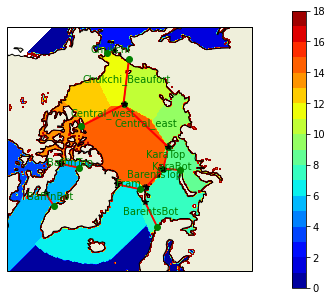

In [17]:
### all
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1,projection=m)
ax.set_extent([-180, 180, 60, 90], ccrs.PlateCarree())
s = ax.contourf(Ngrid.xpts, Ngrid.ypts,Nmask,
               levels = np.arange(0,19,1),cmap='jet')
# s = ax.pcolormesh(gm.G.xpts, gm.G.ypts,np.isin(Nmask,[2,3,4,5,6,7,8,9,10,11,12,13,14,15]))
# s = ax.pcolormesh(gm.G.xpts, gm.G.ypts,np.isin(Nmask,[8,9,10,11,12,13,14,15]))
# s = ax.pcolormesh(gm.G.xpts, gm.G.ypts,gm.mask[0])
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
# x,y = gm.G.mplot(lons_west,lats_west)
# ax.plot(x,y,'-m')
# x,y = gm.G.mplot(lons_east,lats_east)
# ax.plot(x,y,'-g')
for gd in Gate_data1:
#     if 'Fram' in gd.name:
    if '' in gd.name:
        ax.plot(gd.G.xpts,gd.G.ypts,'r') 
        ax.plot(gd.G.xpts[0,0],gd.G.ypts[0,0],'*k') 
        ax.plot(gd.G.xpts[-1,0],gd.G.ypts[-1,0],'og') 
        ax.text(gd.G.xpts.mean(),gd.G.ypts.mean(),gd.name,horizontalalignment='center',color='g')
cax = plt.colorbar(s,  pad=0.12,shrink= 0.85)

In [136]:
regions = [
    {'N_ints':[8,9,10,11,12,13,15],'label':'Basin',
    'gates':[Gate_data1[i]for i in [0,5]],
    'gates_sign':[1.,1.],
    'seas_lim':10.5},
    {'N_ints':[12,13],'label':'Beaufort_Chukchi',
    'gates':[Gate_data1[i]for i in [9,10]],
    'gates_sign':[-1.,1.],
    'seas_lim':3.0},
    {'N_ints':[9,10,11],'label':'Siberian_Laptev_Kara',
    'gates':[Gate_data1[i]for i in [4,8,10]],
    'gates_sign':[-1,-1.,-1.],
    'seas_lim':3.5},
    {'N_ints':[15],'label':'Central',
    'gates':[Gate_data1[i]for i in [0,2,3,8,9]],
    'gates_sign':[1.,1.,1.,1.,1.],
    'seas_lim':5.5},
#     {'N_ints':[10,11],'label':'Siberian_Laptev'},
#     {'N_ints':[9],'label':'Kara'},
    {'N_ints':[8],'label':'Barents',
    'gates':[Gate_data1[i]for i in [1,2,4]],
    'gates_sign':[-1.,-1.,-1.],
    'seas_lim':0.35},
    {'N_ints':[7],'label':'Greenland',
    'gates':[Gate_data1[i]for i in [0]],
    'gates_sign':[-1.],
    'seas_lim':0.35},
    {'N_ints':[6],'label':'Baffin',
    'gates':[Gate_data1[i]for i in [7]],
    'gates_sign':[1.],
    'seas_lim':1.0},
#     {'N_ints':[6],'label':'Baffin'},
#     {'N_ints':[7],'label':'Greenland'},
]

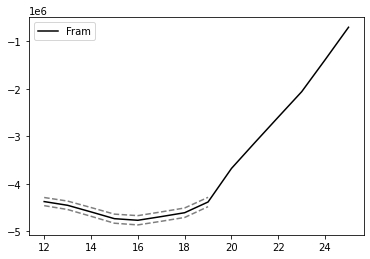

In [20]:
t = 0
for gl in Gate_data1[:1]:
    pvec = gl.transport_y[t,:,0]
    psig = np.sqrt(gl.trans_y_sig[t,:,0])
plt.plot(pvec,'-k',label=gl.name)
plt.plot(pvec-psig,'--k',alpha=0.5)
plt.plot(pvec+psig,'--k',alpha=0.5)
plt.legend()
plt.show()

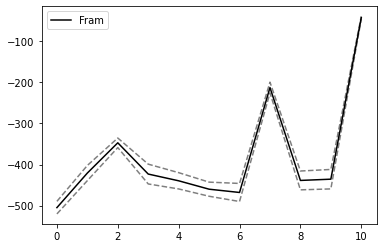

In [21]:
# gl = Gate_data1[0]
for gl in Gate_data1[:1]:
    pvec = np.nansum(gl.transport_y*gl.G.xdist[None,:,:],axis=(1,2))/2*1e-9
    psig = np.nansum(np.sqrt(gl.trans_y_sig)*gl.G.xdist[None,:,:],axis=(1,2))/2*1e-9
#     psig = np.sqrt(np.nansum(gl.trans_y_sig*gl.G.xdist[None,:,:],axis=(1,2))/2)*1e-9
    plt.plot(pvec,'-k',label=gl.name)
    plt.plot(pvec-psig,'--k',alpha=0.5)
    plt.plot(pvec+psig,'--k',alpha=0.5)
plt.legend()
plt.show()

In [22]:
pscale=1e-12
for rg in regions:
    bud1.mask=False
    rg_int= rg['N_ints']
    bud1.build_static_mask(
        np.isin(NG2G.rg_array(Nmask,method='nearest'),rg_int)*np.isfinite(G.mask))
    bud1.data = bud1.new_ice+bud1.old_ice
    plt.plot([np.nansum(bud1[y]*G.area[None,:,:]*pscale)
              for y in range(bud1.nyrs)])
    bud1.data = bud1.int_t
    plt.plot([np.nansum(bud1[y]*G.area[None,:,:]*pscale)
              for y in range(bud1.nyrs)],'-k')
    bud1.data = bud1.res_t
    plt.plot([np.nansum(bud1[y]*G.area[None,:,:]*pscale)
              for y in range(bud1.nyrs)],'--k')
    bud1.data = bud1.int_t + bud1.new_ice+bud1.old_ice
    plt.plot([np.nansum(bud1[y]*G.area[None,:,:]*pscale)
              for y in range(bud1.nyrs)],'-r')
    plt.title(rg['label'])
    plt.show()

Building new mask array


NameError: name 'pscale' is not defined

In [44]:
Bt = bi.Bristol_thickness_seasonal('../Data/Bristol/80km_seasonal/',infile='uit_cryosat2_seaicethickness_nh_80km_v1p7.nc')
GB = gs.grid_set(m)
GB.load_grid('grids/Bristol_nh_80km_gs.npz')
GB2G = gs.Gs2Gs(GB,G)

Loaded a grid: grids/Bristol_nh_80km_gs.npz


In [45]:

Bt.get_dates(dt.datetime(2020,1,15),dt.datetime(2020,10,15))
Bt.dates[:14]

Bristol_hi_seasonal Found 284 dates


[datetime.datetime(2010, 10, 10, 0, 0),
 datetime.datetime(2010, 10, 25, 0, 0),
 datetime.datetime(2010, 11, 9, 0, 0),
 datetime.datetime(2010, 11, 24, 0, 0),
 datetime.datetime(2010, 12, 10, 0, 0),
 datetime.datetime(2010, 12, 25, 0, 0),
 datetime.datetime(2011, 1, 10, 0, 0),
 datetime.datetime(2011, 1, 25, 0, 0),
 datetime.datetime(2011, 2, 9, 0, 0),
 datetime.datetime(2011, 2, 23, 0, 0),
 datetime.datetime(2011, 3, 9, 0, 0),
 datetime.datetime(2011, 3, 24, 0, 0),
 datetime.datetime(2011, 4, 8, 0, 0),
 datetime.datetime(2011, 4, 23, 0, 0)]

In [138]:
Bt.get_dates(dt.datetime(2010,10,15),dt.datetime(2011,10,15))
Bt.dates[:3]
min2010 = GB2G.rg_array(Bt.get_hi([dt.datetime(2010,10,25)]))
# max2011 = GB2G.rg_array(Bt.get_hi([dt.datetime(2011,4,23)]))


Bristol_hi_seasonal Found 284 dates


In [139]:
pscale = 1e-12
min_vol = np.nansum(bud1.inst_thickness*G.area[None,:,:]*G.mask,axis=(1,2))*pscale
np.nansum(min2010*G.area*G.mask)*pscale ,min_vol,np.diff(min_vol)

(4.813641722809913,
 array([2.77472439, 2.81507548, 4.98002831, 4.05131735, 3.8156545 ,
        3.68452861, 4.25604782, 3.79547774, 3.28818877, 2.80046194]),
 array([ 0.04035109,  2.16495282, -0.92871096, -0.23566285, -0.13112589,
         0.57151921, -0.46057007, -0.50728897, -0.48772683]))

In [33]:
# help(ax.legend)

In [140]:
all_min = np.concatenate([np.expand_dims(min2010,0),bud1.inst_thickness],axis=0) ## for mins
# all_min = np.concatenate([np.expand_dims(max2011,0),bud1.inst_thickness],axis=0) ## for mins

Building new mask array
Basin
Building new mask array
Beaufort_Chukchi
Building new mask array
Siberian_Laptev_Kara
Building new mask array
Central
Building new mask array
Barents
Building new mask array
Greenland
Building new mask array
Baffin
/Users/h/PREMELT/Budget/Outputs/Outputs_2023_08_17/out_OSISAF_nt_Bristol_full_year_min/GrowMelt_EASE_NH/Season_diff_bud_exports_all.pdf


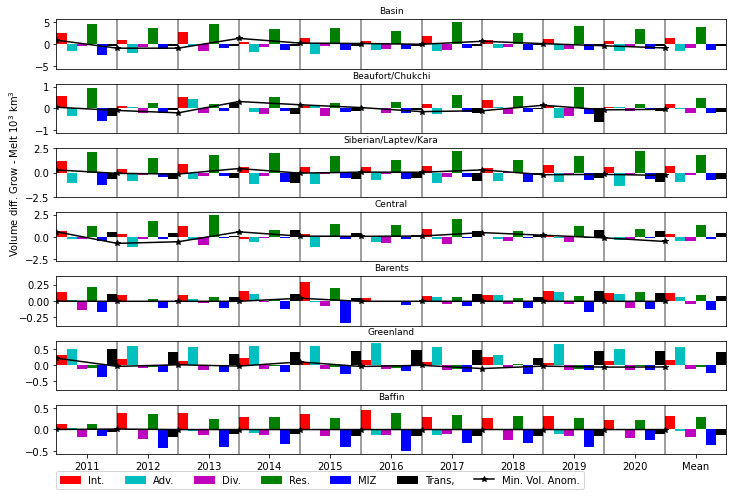

In [143]:
### seasonal: but growth - melt (under/over producing)
### grow: oct - march inclusive
### melt: apr - sept inclusive
### grow - melt
# clines = [plt.cm.jet(int(p)) for p in np.linspace(0,256,len(rg['gates']))]
lines=[]
years=[]
line_colors=[]
t_set=[]
line_labels = []
show_plot = True
plot_type='.pdf'
plot_label = 'Season_diff_bud_exports_all'
bcolors = ['r','c','m','g']
nbars = 6
nyrs = bud1.nyrs ### cut off 2010 (incomplete)
yplot0 = [y for y in bud1.years[1:]+[2020]]
# yplot0 = [y for y in bud1.years[1:]+[2021]]
yplot = [y-0.5+1/nbars/2 for y in yplot0]
yplot.append(yplot[-1]+1)
bspan = 1/nbars ### 3 columns per year
mlabel_step = 2
nrows = len(regions)
ydim = 8
pscale = 1e-12
ts = bud1.dates[0]
te = bud1.dates[-1]
f= plt.figure(figsize=(12,ydim))
for nr,rg in enumerate(regions[:]):
    minmax_d = [0.0,0.0]
    axlist_d = []
    bud1.mask=False
    rg_int= rg['N_ints']
    bud1.build_static_mask(
        np.isin(NG2G.rg_array(Nmask,method='nearest'),rg_int)*np.isfinite(G.mask))
    print(rg['label'])
#     ba.bud1get_clim_lines(bud1,9,12,G)#,extend_div=True
#               ,years=[year_plus,year_mins],line_colors=['b','r'],line_labels = ['AO+','AO-']
#                         )
#     pscale = 1e-12*60*60*24
    #### first plot, big variables
    ax = f.add_subplot(nrows,1,nr+1)
    #### year seperation lines
    [ax.axvline(y+0.5,color='k',alpha = 0.5) for y in yplot0]
    ax.set_xlim([yplot0[0]-0.5,yplot0[-1]+1.5])
    b_all = []
    for n, (var, cl) in enumerate(zip(['intensification','advection','divergence','residual'],bcolors)):
        bud1.set_var(var)
#         bud1.data *= np.array(bud1.days_per_slice)[:,None,None]/30 ## convert to monthly growth 
#         dtemp,plot_temp = bud1.mean_series(time_set=t_set,method='sum',mask=True,
#                                         mult_array=G.xdist*G.ydist*pscale)
        #### split into grow/melt
        ### Grow example [dtemp[y*12:y*12+6] for y in range(bud1.nyrs-1)]
#         bplot = [np.nansum(plot_temp[y*12:y*12+6]) + np.nansum(plot_temp[y*12+6:y*12+12])
#         bplot = [np.nansum(plot_temp[y*12:y*12+12])
        bplot = [np.nansum(bud1[y]*G.area[None,:,:]*pscale)
                   for y in range(bud1.nyrs)]
        bplot.append(np.mean(bplot))
        b = ax.bar([y+n*bspan for y in yplot],bplot,width=bspan,color=cl)
        b_all.append(b.get_children()[-1])
#         l, = ax.plot_date(dtemp,plot_temp,linestyle='-',color = cl,marker='',linewidth = 1,label=var)#,
#     bud1.data = bud1.int_t + bud1.new_ice+bud1.old_ice
    bud1.data = bud1.int_t + bud1.new_ice+bud1.old_ice
#     bud1.data =  bud1.new_ice+bud1.old_ice
    bplot = [np.nansum(bud1[y]*G.area[None,:,:]*pscale)
              for y in range(bud1.nyrs)]
    bplot.append(np.mean(bplot))
    b = ax.bar([y+(n+1)*bspan for y in yplot],bplot,width=bspan,color='b')
    b_all.append(b.get_children()[-1])
    ax.set_title(rg['label'].replace('_','/'),fontsize = 9)
#     if nr == int(nrows/2):
    if nr == 2:
        ax.set_ylabel('Volume diff. Grow - Melt 10$^3$ km$^3$')
    if nr == nrows-1: 
        ax.set_xticks(yplot0+[yplot0[-1]+1])
        ax.set_xticklabels(yplot0+['Mean'])
    else:
        ax.xaxis.set_ticks([])
    if nr == nrows-1: 
#     if nr == 0:
        lcolors = {'Int.':'r', 'Adv.':'c','Div.':'m', 'Res.':'g',
                  'MIZ':'b', 'Trans,':'k'}
        labels = list(lcolors.keys())
        handles = [plt.Rectangle((0,0),1,1, color=lcolors[label]) for label in labels]
#     plt.legend(handles, labels)
    all_mask = G.mask.copy()
    all_mask[~np.isin(NG2G.rg_array(Nmask,method='nearest'),rg_int)] = np.nan
#     vol_diff = np.diff(np.nansum(all_min*G.area[None,:,:]*all_mask,axis=(1,2))*pscale)
    vol_diff = np.nansum(all_min*G.area[None,:,:]*all_mask,axis=(1,2))*pscale
    vol_diff = vol_diff-np.nanmean(vol_diff)
    l = ax.plot([yplot0[0] - 0.5]+[y+0.5 for y in yplot0],
            vol_diff,'-*k',label = 'Min. Vol.')
    if nr == nrows-1: 
#     if nr == 0:
        handles.append(l[0])
        labels.append('Min. Vol. Anom.')
        ax.legend(handles, labels,loc=[0.0,-0.7],ncol = 7)
    #### second is dynamics
#     ax = f.add_subplot(nrows,1,2)
#     for n, (var, cl) in enumerate(zip(['divergence','advection','dynamics'],['b','r','m'])):
#         axlist_d.append(ax)
#         bud1.set_var(var)
#         bud1.data *= np.array(bud1.days_per_slice)[:,None,None]/30 ## convert to monthly growth 
#         dtemp,plot_temp = bud1.mean_series(time_set=t_set,method='sum',mask=True,
#                                         mult_array=G.xdist*G.ydist*pscale)
#         l, = ax.plot_date(dtemp,plot_temp,linestyle='-',color = cl,marker='',linewidth = 1,label=var)#,
#         minmax_d[0] = np.minimum(minmax_d[0],np.min(plot_temp))
#         minmax_d[1] = np.maximum(minmax_d[1],np.max(plot_temp))
    
#     ax.legend()
#     ax.set_ylabel('Volume change 10$^6$ km$^3$')
#     ax.xaxis.set_ticks([])
#     #### all the gates too
    clines = [plt.cm.jet(int(p)) for p in np.linspace(0,256,len(rg['gates']))]
#     ax = f.add_subplot(3,1,3)
#     axlist_d.append(ax)
#     rg['gates']
#     gsum = []
    all_gates_all = []
    for gl,gls,cl in zip(rg['gates'],rg['gates_sign'],clines):
        ### for each sum all gates
        gl.set_var('transport_x')
    # bud1.data *= np.array(bud1.days_per_slice)[:,None,None]
#         dtemp,plot_temp = gl.mean_series(method='sum',
#                                    mult_array=gls*gl.G.xdist*pscale/2)
        plot_temp = np.nansum(gl.transport_y*gl.G.xdist[None,:,:],axis=(1,2))/2*pscale*gls
#         bplot = [np.nansum(bud1[y*12:y*12+12]*G.xdist[None,:,:]*G.ydist[None,:,:]*pscale)
        all_gates_all.append(plot_temp)
    bplot = [bp for bp in np.nansum(all_gates_all,axis = 0)]
#     bplot = [np.nansum(plot_temp[y*12:y*12+6]) + np.nansum(plot_temp[y*12+6:y*12+12])
    bplot.append(np.mean(bplot))
    b = ax.bar([y+(nbars-1)*bspan for y in yplot],bplot,width=bspan,color='k')
    minmax = ax.get_ylim()
    ymax = np.maximum(-minmax[0],minmax[1])*1.05
    ax.set_ylim([-ymax,ymax])
#     l, = ax.plot_date(dtemp,np.nansum(all_gates_all,axis = 0),linestyle = '-',color = 'k',
#                       marker='',linewidth= 2,label = 'All gates')

#     #     ax.legend(lines,['Mean']+line_labels)
#     ax.set_ylabel('Ice export 10$^3$ km$^3$')
#     ax.legend()
#     #         ax.legend(lines)
#     #     ax.set_title(gl.name)
# #     ax.axes.set_xlim([0,nmonths-1])
#     for ax in axlist_d: 
#         ax.set_ylim(minmax_d)
#         ax.set_xlim([ts,te])
f.subplots_adjust(hspace=0.3)
f.savefig(save_dir+plot_label+plot_type,bbox_inches='tight')
print(save_dir+plot_label+plot_type)
plt.show()

    

In [122]:
from sklearn import linear_model 
from scipy import stats
import pandas as pd
def LR_complete(Xin,yin,labels = None):
    k = Xin.shape[1]
    n = yin.shape[0]
    if labels is None:
        labels = [r'Var {}'.format(i+1) for i in range(Xin.shape[1])]
    labels=['Intercept']+labels
    lm = linear_model.LinearRegression()
    lm.fit(Xin,yin)
    params = np.append(lm.intercept_,lm.coef_)
    predictions = lm.predict(Xin)
    
    Xnull = np.zeros([Xin.shape[0],1])

    newX = pd.DataFrame({"Constant":np.ones(len(Xin))}).join(pd.DataFrame(Xin))
    MSE = (sum((yin-predictions)**2))/(len(newX)-len(newX.columns))
    ymean = yin.mean()
    Rsq_det = ((yin-ymean)**2).sum()

    # Note if you don't want to use a DataFrame replace the two lines above with
    # newX = np.append(np.ones((len(X),1)), X, axis=1)
    # MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))
    Rsq = np.zeros([Xin.shape[1]+1])
    Covs = np.zeros([Xin.shape[1]+1])
    for i in range(Xin.shape[1]):
        lm1 = linear_model.LinearRegression()
        Xnull[:,0] = Xin[:,i]
        lm1.fit(Xnull,yin)
        predictions1 = lm1.predict(Xnull)
        MSE1 = ((yin-predictions1)**2).sum()
        Rsq[i+1] = 1.0 - MSE1/Rsq_det
        Covs[i+1] = pearsonr(Y,Xin[:,i])[0]

    var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
    sd_b = np.sqrt(var_b)
    ts_b = params/ sd_b

    p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(Xin[0])))) for i in ts_b]

    sd_b = np.round(sd_b,3)
    ts_b = np.round(ts_b,3)
    p10_values = [np.round(np.log10(p),3) for p in p_values]
    p_values = np.round(p_values,3)
    params = np.round(params,4)
    tot_Rsq = lm.score(Xin,yin)
#     print(tot_Rsq,n,k)
    adj_Rsq = 1.0 - ((1.0-tot_Rsq)*(n-1.0)/(n-k-1.0))

    myDF3 = pd.DataFrame()
#     myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["R_sq"],myDF3["Probabilities"],myDF3["Log10 Prob."] = [params,sd_b,ts_b,Rsq,p_values,p10_values]
    myDF3['Variables'],myDF3["Coeffs."],myDF3["Std. Errs"],myDF3["t values"],myDF3["R_sq"],myDF3["Prob."],myDF3["Log10 Prob."] = [labels,params,sd_b,ts_b,Rsq,p_values,p10_values]
    myDF3['Cov.'] = Covs
#     myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["R_sq"] = [params,sd_b,ts_b,Rsq,]
    return tot_Rsq,myDF3,adj_Rsq


Building new mask array
Basin
0.9282599614574304 0.8804332690957173
        Variables  Coeffs.  Std. Errs  t values      R_sq  Prob.  Log10 Prob.  \
0       Intercept   1.7372      0.781     2.225  0.000000  0.061       -1.212   
1  adv._Grow-Melt   1.0005      0.311     3.212  0.242300  0.015       -1.829   
2  div._Grow-Melt   0.9149      0.565     1.618  0.243792  0.150       -0.825   
3  res._Grow-Melt   0.7545      0.222     3.403  0.526211  0.011       -1.943   
4   MIZ_Grow-Melt   1.2598      0.284     4.442  0.586888  0.003       -2.523   

       Cov.  
0  0.000000  
1  0.492240  
2 -0.493753  
3  0.725404  
4  0.766086  


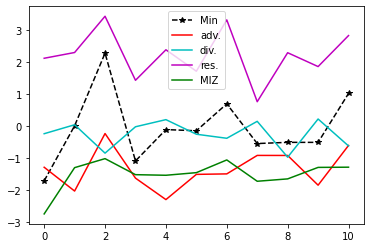

Building new mask array
Beaufort_Chukchi
0.9902779086095589 0.9837965143492649
        Variables  Coeffs.  Std. Errs  t values      R_sq  Prob.  Log10 Prob.  \
0       Intercept  -0.0177      0.025    -0.695  0.000000  0.509       -0.293   
1  adv._Grow-Melt   1.3197      0.058    22.626  0.427694  0.000       -7.079   
2  div._Grow-Melt   1.0875      0.068    16.092  0.022533  0.000       -6.061   
3  res._Grow-Melt   1.0838      0.062    17.351  0.008769  0.000       -6.285   
4   MIZ_Grow-Melt   0.2334      0.070     3.354  0.119284  0.012       -1.914   

       Cov.  
0  0.000000  
1  0.653983  
2  0.150110  
3 -0.093641  
4  0.345375  


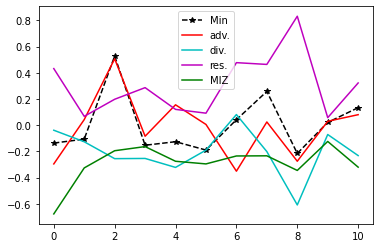

Building new mask array
Siberian_Laptev_Kara
0.978834618474429 0.9647243641240483
        Variables  Coeffs.  Std. Errs  t values      R_sq  Prob.  Log10 Prob.  \
0       Intercept   0.1752      0.180     0.976  0.000000  0.362       -0.442   
1  adv._Grow-Melt   1.1222      0.151     7.440  0.179573  0.000       -3.840   
2  div._Grow-Melt   1.2840      0.392     3.274  0.454920  0.014       -1.867   
3  res._Grow-Melt   1.1107      0.193     5.753  0.296549  0.001       -3.157   
4   MIZ_Grow-Melt   0.5415      0.107     5.044  0.719841  0.001       -2.827   

       Cov.  
0  0.000000  
1  0.423761  
2 -0.674477  
3  0.544563  
4  0.848435  


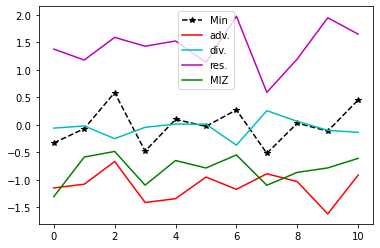

Building new mask array
Central
0.8991090084508649 0.8318483474181082
        Variables  Coeffs.  Std. Errs  t values      R_sq  Prob.  Log10 Prob.  \
0       Intercept   0.4166      0.243     1.714  0.000000  0.130       -0.885   
1  adv._Grow-Melt  -0.2581      0.386    -0.669  0.010586  0.525       -0.280   
2  div._Grow-Melt  -0.2772      0.573    -0.484  0.090941  0.643       -0.192   
3  res._Grow-Melt   0.7242      0.213     3.405  0.602818  0.011       -1.944   
4   MIZ_Grow-Melt   3.3023      0.798     4.141  0.294313  0.004       -2.362   

       Cov.  
0  0.000000  
1 -0.102886  
2 -0.301564  
3  0.776414  
4  0.542506  


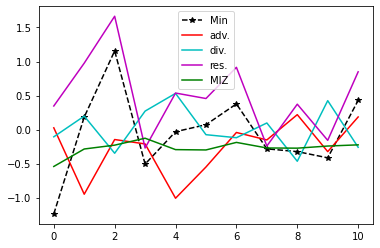

In [125]:
pscale = 1e-12
year_set = [2011,2021]
# ng =regions[1]
for rg in regions[:4]:
    rg_int= rg['N_ints']
    bud1.mask=False
    bud1.build_static_mask(
        np.isin(NG2G.rg_array(Nmask,method='nearest'),rg_int)*np.isfinite(G.mask))
    all_mask = G.mask.copy()
    all_mask[~np.isin(NG2G.rg_array(Nmask,method='nearest'),rg_int)] = np.nan
    Y = np.diff(np.nansum(all_min*all_mask*G.area[None,:,:]*G.mask*pscale,axis=(1,2)))
#     Y=Y[1:]
    X= []
#     var_list = ['intensification','advection','divergence','dynamics','residual','MIZ']
#     var_l = ['int.','adv.','dive.','dyn.','res.','MIZ','Gates']
#     var_list = ['intensification','advection','divergence','residual','MIZ']
#     var_l = ['int.','adv.','dive.','res.','MIZ','Gates']
    var_list = ['advection','divergence','residual','MIZ']
#     var_l = ['adv.','div.','res.','MIZ','Gates']
    var_l = ['adv.','div.','res.','MIZ']
#     var_list = ['advection','divergence','residual']
#     var_l = ['adv.','div.','res.','MIZ','Gates']
#     var_l = ['adv.','div.','res.']
#     var_list = ['dynamics','residual','MIZ']
#     var_l = ['dyn','res.','MIZ']
#     var_l = ['dyn','res.','MIZ','Gates']
#     var_list = ['intensification','MIZ']
#     var_l = ['int.','MIZ']
#     var_l = ['int.','MIZ','Gates']
#     var_list = ['residual','advection','MIZ']
#     var_l = ['res.','adv.','MIZ']
#     var_l = ['res.','MIZ','Gates']
#     var_list = ['intensification']
#     var_l = ['int.','Gates']
    labels = [var+GM for var in var_l for GM in ['_Grow-Melt']]
    for var in var_list:
        bud1.set_var(var)
        prd = 0
#         dtemp,plot_temp = bud1.mean_series(periods= [prd],year_set=year_set,year_form='year',
#                                            method='sum',mult_array=G.area*pscale,mask=True)
        bplot = [np.nansum(bud1[y]*G.area[None,:,:]*pscale)
                   for y in range(bud1.nyrs)]
        X.append(bplot)
    #         print(le(plot_temp))

    ### GATES
    XGM = []
    prd = 0
    all_gates_all = []
    clines = [plt.cm.jet(int(p)) for p in np.linspace(0,256,len(rg['gates']))]
    for gl,gls,cl in zip(rg['gates'],rg['gates_sign'],clines):
        gl.set_var('transport_y')
        ### for each sum all gates
#         dtemp,plot_temp = gl.mean_series(periods= [prd],year_set=year_set,year_form='year',method='sum',
#                                    mult_array=gls*gl.G.xdist*pscale/2)
        plot_temp = np.nansum(gl.transport_y*gl.G.xdist[None,:,:],axis=(1,2))/2*pscale*gls
        all_gates_all.append(plot_temp)
    if 'Gates' in var_l: X.append(np.array(all_gates_all).sum(axis=0))
    ### load the min/max volumes, then take each seasons mean comp, do the anomaly, then multi-lin regress
    ### Y is the min vol change per year
    ### X is all the components in order (G/M) , int, adv, div, res, transp
    regr = LR_complete(np.vstack(X).T,Y,labels=labels)
    print(rg['label'])
    print(regr[0],regr[2])
    print(regr[1])
    lcolors = ['r', 'c','m', 'g','b','k']
    plt.plot(Y,'*--k')
    [plt.plot(p,l) for p,l in zip(X,lcolors)]
    plt.legend(['Min']+var_l)
    plt.show()